<a href="https://colab.research.google.com/github/Dwash71/Data-Analytics/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyPl
!pip install 'pandas[excel]'
!pip install Numpy
!pip install python-dateutil
!pip install pytz
!pip install tzdata

In [ ]:
import pandas as pd
#mount google drive
from google.colab import drive
drive.mount('/content/drive')
import os
#os.chdir("/content/drive/My Drive")
#!ls

Mounted at /content/drive


Merging 12 months of sales data into a single file

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales_Analysis/Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir("/content/drive/MyDrive/Colab Notebooks/Sales_Analysis/Sales_Data")]

all_months_data = pd.DataFrame()
for file in files:
  #print(file) #list all files in directory test
   #concatenate files into single csv.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales_Analysis/Sales_Data/"+file)
  all_months_data = pd.concat([all_months_data,df])

#all_months_data.head()
#merge into one csv and store on my drive
all_months_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Sales_Analysis/Sales_Data/all_data.csv",index=False)



Read the updated dataframe

In [ ]:
all_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales_Analysis/Sales_Data/all_data.csv")
all_data.head()

Order ID                   Product Quantity Ordered Price Each  \
0   222910  Apple Airpods Headphones                1        150   
1   222911             Flatscreen TV                1        300   
2   222912     AA Batteries (4-pack)                1       3.84   
3   222913     AA Batteries (4-pack)                1       3.84   
4   222914    AAA Batteries (4-pack)                5       2.99   

       Order Date                  Purchase Address  
0  07/26/19 16:51   389 South St, Atlanta, GA 30301  
1  07/05/19 08:55     590 4th St, Seattle, WA 98101  
2  07/29/19 12:41    861 Hill St, Atlanta, GA 30301  
3  07/28/19 10:15   190 Ridge St, Atlanta, GA 30301  
4  07/31/19 02:13  824 Forest St, Seattle, WA 98101

Clean up data

Drop rows of NaN

In [ ]:
#show all rows that contain NaN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

#drop rows that contain NaNs
all_data = all_data.dropna(how='all')
all_data.head()

Order ID                   Product Quantity Ordered Price Each  \
0   222910  Apple Airpods Headphones                1        150   
1   222911             Flatscreen TV                1        300   
2   222912     AA Batteries (4-pack)                1       3.84   
3   222913     AA Batteries (4-pack)                1       3.84   
4   222914    AAA Batteries (4-pack)                5       2.99   

       Order Date                  Purchase Address  
0  07/26/19 16:51   389 South St, Atlanta, GA 30301  
1  07/05/19 08:55     590 4th St, Seattle, WA 98101  
2  07/29/19 12:41    861 Hill St, Atlanta, GA 30301  
3  07/28/19 10:15   190 Ridge St, Atlanta, GA 30301  
4  07/31/19 02:13  824 Forest St, Seattle, WA 98101

Find 'Or' and delete it to remove error

In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

Convert columns to the correct type

In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #make a float

In [ ]:
all_data.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0   222910  Apple Airpods Headphones                 1      150.00   
1   222911             Flatscreen TV                 1      300.00   
2   222912     AA Batteries (4-pack)                 1        3.84   
3   222913     AA Batteries (4-pack)                 1        3.84   
4   222914    AAA Batteries (4-pack)                 5        2.99   

       Order Date                  Purchase Address  
0  07/26/19 16:51   389 South St, Atlanta, GA 30301  
1  07/05/19 08:55     590 4th St, Seattle, WA 98101  
2  07/29/19 12:41    861 Hill St, Atlanta, GA 30301  
3  07/28/19 10:15   190 Ridge St, Atlanta, GA 30301  
4  07/31/19 02:13  824 Forest St, Seattle, WA 98101

Augment data with additional columns

Task 2: Add Month Column

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0   222910  Apple Airpods Headphones                 1      150.00   
1   222911             Flatscreen TV                 1      300.00   
2   222912     AA Batteries (4-pack)                 1        3.84   
3   222913     AA Batteries (4-pack)                 1        3.84   
4   222914    AAA Batteries (4-pack)                 5        2.99   

       Order Date                  Purchase Address Month  
0  07/26/19 16:51   389 South St, Atlanta, GA 30301    07  
1  07/05/19 08:55     590 4th St, Seattle, WA 98101    07  
2  07/29/19 12:41    861 Hill St, Atlanta, GA 30301    07  
3  07/28/19 10:15   190 Ridge St, Atlanta, GA 30301    07  
4  07/31/19 02:13  824 Forest St, Seattle, WA 98101    07

Task 3: Add a Sales column

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0   222910  Apple Airpods Headphones                 1      150.00   
1   222911             Flatscreen TV                 1      300.00   
2   222912     AA Batteries (4-pack)                 1        3.84   
3   222913     AA Batteries (4-pack)                 1        3.84   
4   222914    AAA Batteries (4-pack)                 5        2.99   

       Order Date                  Purchase Address Month   Sales  
0  07/26/19 16:51   389 South St, Atlanta, GA 30301    07  150.00  
1  07/05/19 08:55     590 4th St, Seattle, WA 98101    07  300.00  
2  07/29/19 12:41    861 Hill St, Atlanta, GA 30301    07    3.84  
3  07/28/19 10:15   190 Ridge St, Atlanta, GA 30301    07    3.84  
4  07/31/19 02:13  824 Forest St, Seattle, WA 98101    07   14.95

Task 4: Add a city column (extract city value to do this)

In [ ]:
#create a function method
def get_city(address):
  return address.split(",")[1]

def get_state(address):
  return address.split(",")[2].split(" ")[1]

#Lets use .apply()/split on the commas to draw out city
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} {get_state(x)})")
all_data.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0   222910  Apple Airpods Headphones                 1      150.00   
1   222911             Flatscreen TV                 1      300.00   
2   222912     AA Batteries (4-pack)                 1        3.84   
3   222913     AA Batteries (4-pack)                 1        3.84   
4   222914    AAA Batteries (4-pack)                 5        2.99   

       Order Date                  Purchase Address Month   Sales  \
0  07/26/19 16:51   389 South St, Atlanta, GA 30301    07  150.00   
1  07/05/19 08:55     590 4th St, Seattle, WA 98101    07  300.00   
2  07/29/19 12:41    861 Hill St, Atlanta, GA 30301    07    3.84   
3  07/28/19 10:15   190 Ridge St, Atlanta, GA 30301    07    3.84   
4  07/31/19 02:13  824 Forest St, Seattle, WA 98101    07   14.95   

           City  
0   Atlanta GA)  
1   Seattle WA)  
2   Atlanta GA)  
3   Atlanta GA)  
4   Seattle WA)

Question 1: What was the best month for sales? How much was earned in that month?

In [ ]:
#Grouping by month then suming
results = all_data.groupby(['Month']).sum()

plot transaction

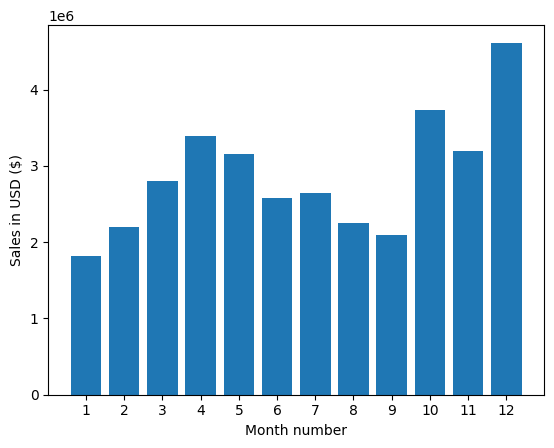

In [ ]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

Question 2: What city had the highest number of sales?

In [ ]:
results = all_data.groupby(['City']).sum()
results

Order ID  \
City                                                                   
Atlanta GA)        2229102229122229132229562229702229802230002230...   
Austin TX)         2229712229812229842230052230122230272230402230...   
Boston MA)         2229292229312229362229632229642229832229982230...   
Dallas TX)         2229192229222229382229492229502229542229582229...   
Los Angeles CA)    2229182229232229262229272229322229332229392229...   
New York City NY)  2229162229172229462229472229872229902229942229...   
Portland ME)       2231342232512233112234052234062234322234462235...   
Portland OR)       2229422229572229822230072230342230352230482230...   
San Francisco CA)  2229152229202229212229242229252229282229302229...   
Seattle WA)        2229112229142229342229432229622229662229722229...   

                                                             Product  \
City                                                                   
Atlanta GA)        Apple Airpods HeadphonesAA Batteries (4-pack)A...   
Austin TX)         Apple Airpods HeadphonesUSB-C Charging CableUS...   
Boston MA)         Vareebadd PhoneUSB-C Charging Cable27in FHD Mo...   
Dallas TX)         Lightning Charging Cable34in Ultrawide Monitor...   
Los Angeles CA)    USB-C Charging CableAAA Batteries (4-pack)Ligh...   
New York City NY)  Google PhoneLG Dryer20in MonitorThinkPad Lapto...   
Portland ME)       ThinkPad LaptopWired HeadphonesAAA Batteries (...   
Portland OR)       Lightning Charging CableAAA Batteries (4-pack)...   
San Francisco CA)  Bose SoundSport HeadphonesAA Batteries (4-pack...   
Seattle WA)        Flatscreen TVAAA Batteries (4-pack)AA Batterie...   

                   Quantity Ordered  Price Each  \
City                                              
Atlanta GA)                   16602  2779908.20   
Austin TX)                    11153  1809873.61   
Boston MA)                    22528  3637409.77   
Dallas TX)                    16730  2752627.82   
Los Angeles CA)               33289  5421435.23   
New York City NY)             27932  4635370.83   
Portland ME)                   2750   447189.25   
Portland OR)                  11303  1860558.22   
San Francisco CA)             50239  8211461.74   
Seattle WA)                   16553  2733296.01   

                                                          Order Date  \
City                                                                   
Atlanta GA)        07/26/19 16:5107/29/19 12:4107/28/19 10:1507/1...   
Austin TX)         07/05/19 14:4907/26/19 00:4007/29/19 21:5007/2...   
Boston MA)         07/04/19 19:4607/18/19 09:2107/04/19 12:2907/2...   
Dallas TX)         07/14/19 13:2407/20/19 21:1207/20/19 17:4907/2...   
Los Angeles CA)    07/14/19 21:1607/05/19 12:1607/15/19 17:4407/3...   
New York City NY)  07/21/19 22:3907/17/19 13:4407/14/19 22:1907/1...   
Portland ME)       07/25/19 12:1707/18/19 14:0907/30/19 17:2607/1...   
Portland OR)       07/07/19 10:0007/19/19 10:1107/28/19 12:4007/0...   
San Francisco CA)  07/03/19 18:3007/30/19 04:4207/02/19 11:0407/1...   
Seattle WA)        07/05/19 08:5507/31/19 02:1307/03/19 23:5107/2...   

                                                    Purchase Address  \
City                                                                   
Atlanta GA)        389 South St, Atlanta, GA 30301861 Hill St, At...   
Austin TX)         444 Spruce St, Austin, TX 73301791 9th St, Aus...   
Boston MA)         882 Hickory St, Boston, MA 02215145 Pine St, B...   
Dallas TX)         29 Jefferson St, Dallas, TX 75001616 Chestnut ...   
Los Angeles CA)    207 1st St, Los Angeles, CA 90001105 Johnson S...   
New York City NY)  745 Chestnut St, New York City, NY 10001490 Ad...   
Portland ME)       298 Wilson St, Portland, ME 04101171 Ridge St,...   
Portland OR)       424 Church St, Portland, OR 97035143 5th St, P...   
San Francisco CA)  899 Elm St, San Francisco, CA 94016590 6th St,...   
Seattle WA)        590 4th St, Seattle, WA 98101824 Forest S

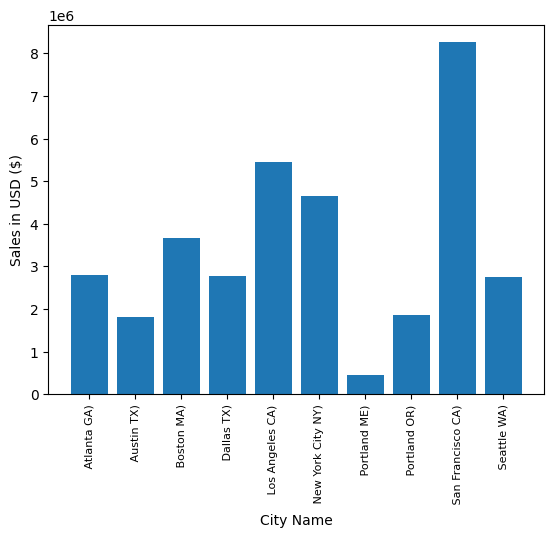

In [ ]:
import matplotlib.pyplot as plt

cities = [cities for cities, df in all_data.groupby('City')]
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

<ipython-input-17-dbfeda91b280>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


Order ID                   Product  Quantity Ordered  Price Each  \
0   222910  Apple Airpods Headphones                 1      150.00   
1   222911             Flatscreen TV                 1      300.00   
2   222912     AA Batteries (4-pack)                 1        3.84   
3   222913     AA Batteries (4-pack)                 1        3.84   
4   222914    AAA Batteries (4-pack)                 5        2.99   

           Order Date                  Purchase Address Month   Sales  \
0 2019-07-26 16:51:00   389 South St, Atlanta, GA 30301    07  150.00   
1 2019-07-05 08:55:00     590 4th St, Seattle, WA 98101    07  300.00   
2 2019-07-29 12:41:00    861 Hill St, Atlanta, GA 30301    07    3.84   
3 2019-07-28 10:15:00   190 Ridge St, Atlanta, GA 30301    07    3.84   
4 2019-07-31 02:13:00  824 Forest St, Seattle, WA 98101    07   14.95   

           City  
0   Atlanta GA)  
1   Seattle WA)  
2   Atlanta GA)  
3   Atlanta GA)  
4   Seattle WA)

In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1
all_data.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0   222910  Apple Airpods Headphones                 1      150.00   
1   222911             Flatscreen TV                 1      300.00   
2   222912     AA Batteries (4-pack)                 1        3.84   
3   222913     AA Batteries (4-pack)                 1        3.84   
4   222914    AAA Batteries (4-pack)                 5        2.99   

           Order Date                  Purchase Address Month   Sales  \
0 2019-07-26 16:51:00   389 South St, Atlanta, GA 30301    07  150.00   
1 2019-07-05 08:55:00     590 4th St, Seattle, WA 98101    07  300.00   
2 2019-07-29 12:41:00    861 Hill St, Atlanta, GA 30301    07    3.84   
3 2019-07-28 10:15:00   190 Ridge St, Atlanta, GA 30301    07    3.84   
4 2019-07-31 02:13:00  824 Forest St, Seattle, WA 98101    07   14.95   

           City  Hour  Minute  Count  
0   Atlanta GA)    16      51      1  
1   Seattle WA)     8      55      1  
2   Atlanta GA)    12      41      1  
3   Atlanta GA)    10      15      1  
4   Seattle WA)     2      13      1

In [ ]:
#create hour and minute column
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0   222910  Apple Airpods Headphones                 1      150.00   
1   222911             Flatscreen TV                 1      300.00   
2   222912     AA Batteries (4-pack)                 1        3.84   
3   222913     AA Batteries (4-pack)                 1        3.84   
4   222914    AAA Batteries (4-pack)                 5        2.99   

           Order Date                  Purchase Address Month   Sales  \
0 2019-07-26 16:51:00   389 South St, Atlanta, GA 30301    07  150.00   
1 2019-07-05 08:55:00     590 4th St, Seattle, WA 98101    07  300.00   
2 2019-07-29 12:41:00    861 Hill St, Atlanta, GA 30301    07    3.84   
3 2019-07-28 10:15:00   190 Ridge St, Atlanta, GA 30301    07    3.84   
4 2019-07-31 02:13:00  824 Forest St, Seattle, WA 98101    07   14.95   

           City  Hour  Minute  Count  
0   Atlanta GA)    16      51      1  
1   Seattle WA)     8      55      1  
2   Atlanta GA)    12      41      1  
3   Atlanta GA)    10      15      1  
4   Seattle WA)     2      13      1

visualize by hour using line chart

In [ ]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.grid()
plt.show()

#My recommedation is around 11am (11) or 7pm (19)

In [ ]:
#shows the count or currency of orders for that hour
all_data.groupby(['Hour']).count()

Order ID  Product  Quantity Ordered  Price Each  Order Date  \
Hour                                                                
0         3910     3910              3910        3910        3910   
1         2350     2350              2350        2350        2350   
2         1243     1243              1243        1243        1243   
3          831      831               831         831         831   
4          854      854               854         854         854   
5         1321     1321              1321        1321        1321   
6         2482     2482              2482        2482        2482   
7         4011     4011              4011        4011        4011   
8         6256     6256              6256        6256        6256   
9         8748     8748              8748        8748        8748   
10       10944    10944             10944       10944       10944   
11       12411    12411             12411       12411       12411   
12       12587    12587             12587       12587       12587   
13       12129    12129             12129       12129       12129   
14       10984    10984             10984       10984       10984   
15       10175    10175             10175       10175       10175   
16       10384    10384             10384       10384       10384   
17       10899    10899             10899       10899       10899   
18       12280    12280             12280       12280       12280   
19       12905    12905             12905       12905       12905   
20       12228    12228             12228       12228       12228   
21       10921    10921             10921       10921       10921   
22        8822     8822              8822        8822        8822   
23        6275     6275              6275        6275        6275   

      Purchase Address  Month  Sales   City  Minute  Count  
Hour                                                        
0                 3910   3910   3910   3910    3910   3910  
1                 2350   2350   2350   2350    2350   2350  
2                 1243   1243   1243   1243    1243   1243  
3                  831    831    831    831     831    831  
4                  854    854    854    854     854    854  
5                 1321   1321   1321   1321    1321   1321  
6                 2482   2482   2482   2482    2482   2482  
7                 4011   4011   4011   4011    4011   4011  
8                 6256   6256   6256   6256    6256   6256  
9                 8748   8748   8748   8748    8748   8748  
10               10944  10944  10944  10944   10944  10944  
11               12411  12411  12411  12411   12411  12411  
12               12587  12587  12587  12587   12587  12587  
13               12129  12129  12129  12129   12129  12129  
14               10984  10984  10984  10984   10984  10984  
15               10175  10175  10175  10175   10175  10175  
16               10384  10384  10384  10384   10384  10384  
17               10899  10899  10899  10899   10899  10899  
18               12280  12280  12280  12280   12280  12280  
19               12905  12905  12905  12905   12905  12905  
20               12228  12228  12228  12228   12228  12228  
21               10921  10921  10921  10921   10921  10921  
22                8822   8822   8822   8822    8822   8822  
23                6275   6275   6275   6275    6275   6275

Question 4: What products are most often sold together?

In [ ]:
#find all duplicate rows
df = all_data[all_data['Order ID'].duplicated(keep=False)]
#df.head(20)
#Group these together
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

#remove duplicates
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head(20)

<ipython-input-38-a24fb6464d0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


Order ID                                            Grouped
118   223028  Vareebadd Phone,USB-C Charging Cable,Wired Hea...
140   223048               Vareebadd Phone,USB-C Charging Cable
188   223095     Apple Airpods Headphones,AA Batteries (4-pack)
201   223106                   Wired Headphones,Vareebadd Phone
213   223117                  Google Phone,USB-C Charging Cable
230   223133       AA Batteries (4-pack),AAA Batteries (4-pack)
238   223140                AA Batteries (4-pack),Flatscreen TV
243   223144                  Google Phone,USB-C Charging Cable
310   223210             AA Batteries (4-pack),27in FHD Monitor
323   223221                Wired Headphones,Macbook Pro Laptop
325   223222              20in Monitor,Apple Airpods Headphones
348   223244       AAA Batteries (4-pack),AA Batteries (4-pack)
426   223321               Vareebadd Phone,USB-C Charging Cable
432   223326                                iPhone,20in Monitor
460   223353                    iPhone,Apple Airpods Headphones
481   223373            USB-C Charging Cable,Macbook Pro Laptop
573   223464                  Google Phone,USB-C Charging Cable
616   223505            Wired Headphones,AAA Batteries (4-pack)
638   223526  Apple Airpods Headphones,Bose SoundSport Headp...
646   223533  Bose SoundSport Headphones,AAA Batteries (4-pack)

In [ ]:
!pip install more-itertools

Count pairs

In [ ]:
#Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Question 5: What product sold the most? Why do you think it sold the most?

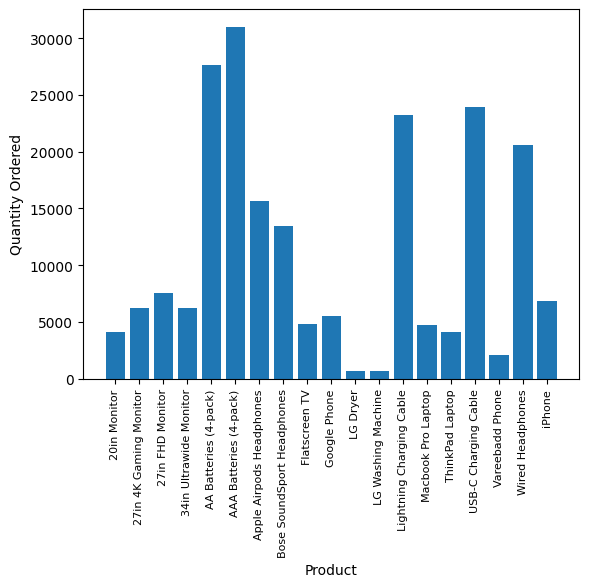

In [ ]:
#what products sold the most
product_group = all_data.groupby('Product')
# Select only numeric columns for sum
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()


Overlay graph with prices

<ipython-input-53-f1ffb0b39d89>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


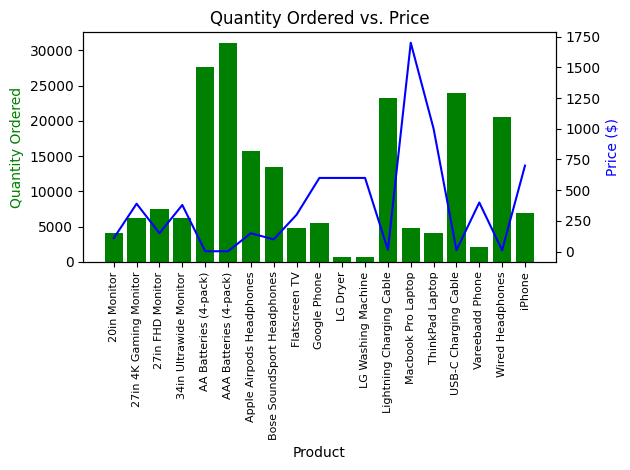

In [ ]:
# Calculate the average price for each product
prices = all_data.groupby('Product')['Price Each'].mean().astype(float)

# Create subplots for the overlay graph
fig, ax1 = plt.subplots()

# Set up twin axes
ax2 = ax1.twinx()

# Plot the quantity ordered and prices
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

# Set labels and titles
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_title('Quantity Ordered vs. Price')
ax1.set_xticklabels(products, rotation='vertical', size=8)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot (optional)
plt.show()